# Data 301 Group 11 Project
## Data Loading and Wrangling Functions

## Data Loading

### Import Package Statements

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading data into pd dataframes

In [164]:
StatCanCPI = []
StatCanBCHPI = []
StatCanCanadaHPI = []
CanadaPIR = []
WorldBankData = []
def loadStatCanCPI():
    StatCanCPI = pd.read_csv('./processed/preprocessed/Stat_Can_CPI_1985_to_Now.csv')
    return StatCanCPI
def loadStatCanBCHPIData():
    StatCanBCHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_BC-only_1986_to_2021_May.csv')
    StatCanBCHPI = StatCanBCHPI.drop(index=[1,2],axis=0)
    return StatCanBCHPI
def loadStatCanCanadaHPIData():
    StatCanCanadaHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_Canada_1981_to_2021_May.csv')
    return StatCanCanadaHPI
def loadCanadaPrimeInterestRate():
    CanadaPIR = pd.read_csv('./processed/preprocessed/Canada-Prime-Rate-History.csv')
    CanadaPIR = CanadaPIR.transpose()
    CanadaPIR.columns = CanadaPIR.iloc[0]
    CanadaPIR.drop(index=CanadaPIR.index[0], axis=0, inplace=True)
    return CanadaPIR
def loadWorldBankData():
    WorldBankData = pd.read_csv('./processed/preprocessed/World Bank Data - Indicators.csv')
    return WorldBankData

In [184]:
def loadAll():
    StatCanCPI = loadStatCanCPI()
    StatCanBCHPI = loadStatCanBCHPIData()
    StatCanCanadaHPI = loadStatCanCanadaHPIData()
    CanadaPIR = loadCanadaPrimeInterestRate()
    WorldBankData = loadWorldBankData()
    dataFrames = [StatCanCPI, StatCanBCHPI, CanadaPIR, WorldBankData]
    return dataFrames
ourData = loadAll()

In [186]:
ourData[3].head()

,Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Unemployment, total (% of total labor force) (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.510000,7.290000,7.070000,6.910000,6.910000,7.000000,6.340000,5.830000,5.660000,9.48000
1,"Unemployment with advanced education, male (% ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750000,5.730000,5.540000,5.590000,5.600000,5.930000,5.270000,4.790000,4.650000,7.43000
2,"Labor force participation rate, total (% of to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.410000,66.250000,66.220000,65.760000,65.610000,65.490000,65.590000,65.260000,65.570000,63.91000
3,"Employment to population ratio, ages 15-24, to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.310000,54.340000,55.060000,55.550000,55.760000,55.380000,56.480000,56.300000,57.470000,49.28000
4,Gross savings (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.857109,20.917951,21.597298,22.148494,19.569364,19.146455,19.845281,19.500026,20.011643,18.71884


In [ ]:
#CanadaPIR.set_index('Date')
ourData[2]
sns.barplot(data = ourData[2])

(1, 427)
  New housing price indexes  Jan-86  Feb-86  Mar-86  Apr-86  May-86  Jun-86  \
0    Total (house and land)    66.3    66.4    66.4    66.8    67.1    66.9   

   Jul-86  Aug-86  Sep-86  ...  20-Sep  20-Oct  20-Nov  20-Dec  21-Jan  \
0    66.8    66.8    67.2  ...   110.2   111.5   111.8   111.9   112.3   

   21-Feb  21-Mar  21-Apr  21-May  21-Jun  
0   116.3   117.2   118.9   120.0   119.7  

[1 rows x 427 columns]


<AxesSubplot:>

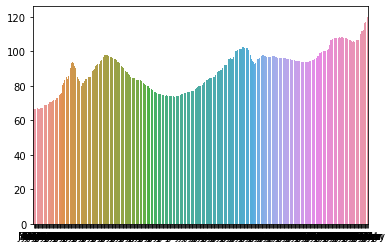

In [168]:
print(StatCanBCHPI.shape)
print(StatCanBCHPI)
sns.barplot(data = StatCanBCHPI)

In [95]:
MasterDataDF = []
